In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import tree

In [2]:
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(X)

[[1000025       5       1 ...       3       1       1]
 [1002945       5       4 ...       3       2       1]
 [1015425       3       1 ...       3       1       1]
 ...
 [ 888820       5      10 ...       8      10       2]
 [ 897471       4       8 ...      10       6       1]
 [ 897471       4       8 ...      10       4       1]]


In [4]:
print(y)

[2 2 2 2 2 4 2 2 2 2 2 2 4 2 4 4 2 2 4 2 4 4 2 2 4 2 2 2 2 2 2 4 2 2 2 4 2
 4 4 4 4 4 4 2 4 2 2 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 2 4 2 4 4 2 2 4 2 4 4 2
 2 2 2 2 2 2 2 2 4 4 4 4 2 2 2 2 2 2 2 2 2 2 4 4 4 4 2 4 4 4 4 4 2 4 2 4 4
 4 2 2 2 4 2 2 2 2 4 4 4 2 4 2 4 2 2 2 4 2 2 2 2 2 2 2 2 4 2 2 4 2 2 4 2 4
 4 2 2 4 2 2 4 4 2 2 2 2 4 4 2 2 2 2 2 4 4 4 2 4 2 4 2 2 2 4 4 2 4 4 4 2 4
 4 2 2 2 2 2 2 2 2 4 4 2 2 2 4 4 2 2 2 4 4 2 4 4 4 2 2 4 2 2 4 4 4 4 2 4 4
 2 4 4 4 2 4 2 4 4 4 4 2 2 2 2 2 2 4 4 2 2 4 2 4 4 4 2 2 2 2 4 4 4 4 4 2 4
 4 4 2 4 2 4 4 2 2 2 2 4 2 2 4 4 4 4 4 2 4 4 2 2 4 4 2 2 4 4 2 4 2 4 4 2 2
 4 2 2 2 4 2 2 4 4 2 2 4 2 4 2 2 4 2 4 4 4 2 2 4 4 2 4 2 2 4 4 2 2 2 4 2 2
 2 4 4 2 2 2 4 2 2 4 4 4 4 4 4 2 2 2 2 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2
 2 2 4 2 2 2 2 4 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 4 2 4 2 4 2 2 2 2 4
 2 2 2 4 2 4 2 2 2 2 2 2 2 4 4 2 2 2 4 2 2 2 2 2 2 2 2 4 2 2 2 4 2 4 4 4 2
 2 2 2 2 2 2 4 4 4 2 2 2 2 2 2 2 2 2 2 2 4 2 2 4 4 2 2 2 4 4 4 2 4 2 4 2 2
 2 2 2 2 2 2 2 2 2 2 4 2 

In [5]:
dataset.values

array([[1000025,       5,       1, ...,       1,       1,       2],
       [1002945,       5,       4, ...,       2,       1,       2],
       [1015425,       3,       1, ...,       1,       1,       2],
       ...,
       [ 888820,       5,      10, ...,      10,       2,       4],
       [ 897471,       4,       8, ...,       6,       1,       4],
       [ 897471,       4,       8, ...,       4,       1,       4]],
      shape=(683, 11))

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 0)

In [7]:
print(X_train)

[[ 752904      10       1 ...       5       4       1]
 [1218860       1       1 ...       3       1       1]
 [ 411453       5       1 ...       3       1       1]
 ...
 [1214092       1       1 ...       1       1       1]
 [1303489       3       1 ...       2       1       1]
 [ 378275      10       9 ...       7       7       1]]


In [8]:
print(y_train)

[4 2 2 2 4 2 2 2 2 4 2 4 2 4 4 2 2 2 2 4 4 2 4 4 4 4 4 4 2 2 2 2 2 2 4 4 4
 2 2 2 4 2 2 4 4 2 4 2 2 4 4 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 4 4 2 4 2 2 2
 4 2 2 2 2 4 4 2 2 4 4 2 2 4 4 2 4 2 4 4 2 2 2 4 2 4 2 4 2 2 2 2 2 4 2 2 4
 2 2 4 2 2 2 2 2 4 2 2 4 2 4 2 2 4 4 4 2 2 2 2 2 2 4 4 2 2 2 2 2 2 2 4 2 2
 4 2 2 2 2 2 2 2 4 2 2 2 4 4 2 4 2 2 2 4 2 2 2 4 4 2 4 2 2 4 2 2 2 2 2 2 2
 4 4 4 4 2 4 2 4 2 4 4 4 2 2 4 2 2 2 2 4 4 2 2 2 4 2 2 4 2 2 2 2 4 4 2 2 2
 2 2 2 2 2 2 2 2 4 2 4 2 2 2 2 2 2 4 4 4 4 2 2 4 2 4 2 4 2 2 2 2 4 2 4 2 2
 2 2 4 2 2 4 2 2 2 2 2 2 2 4 2 4 2 2 2 4 2 2 2 2 2 4 2 2 2 2 4 2 2 4 2 2 2
 2 4 4 2 2 2 2 4 2 2 4 2 2 2 2 4 4 2 4 2 4 2 2 2 4 4 4 2 2 2 2 2 2 2 2 4 4
 2 2 2 2 2 2 2 4 4 2 2 2 2 4 4 4 2 4 2 4 2 2 2 2 2 4 2 4 4 2 2 2 2 2 2 2 4
 2 2 2 4 2 2 4 4 4 2 4 4 4 2 2 2 4 2 4 2 2 4 2 4 4 4 2 2 2 4 2 4 4 4 2 2 2
 4 2 4 2 2 2 2 4 4 2 2 2 4 4 2 2 4 2 2 2 4 4 2 2 2 4 2 2 2 4 2 4 2 2 4 2 2
 2 2 4 4 2 2 4 4 2 2 4 4 4 2 2 4 2 2 2 2 2 4 2 4 4 2 2 2 2 4 2 2 2 2 4 2 4
 2 4 2 2 4 2 2 2 2 4 2 2 

In [9]:
print(X_test)

[[1173347       1       1 ...       1       1       1]
 [1156017       3       1 ...       2       1       1]
 [ 706426       5       5 ...       4       3       1]
 ...
 [ 369565       4       1 ...       1       1       1]
 [1313325       4      10 ...       9      10       1]
 [1136142       2       1 ...       2       1       1]]


In [10]:
print(y_test)

[2 2 4 4 2 2 2 4 2 2 4 2 4 2 2 2 4 4 4 2 2 2 4 2 4 4 2 2 2 4 2 4 4 2 2 2 4
 4 2 4 2 2 2 2 2 2 2 4 2 2 4 2 4 2 2 2 4 2 2 4 2 2 2 2 2 2 2 2 4 4 2 2 2 2
 2 2 4 2 2 2 4 2 4 2 2 4 2 2 4 2 4 2 4 4 4 2 4 4 4 2 2 2 4 4 2 2 4 4 2 2 4
 2 2 4 2 2 2 4 2 2 2 4 2 2 4 4 2 4 2 4 2 2 4 2 2 4 2]


In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [12]:
print(X_train)

[[-0.49838781  1.98839518 -0.69781134 ...  0.61907387  0.34532102
  -0.33863738]
 [ 0.19242611 -1.22468404 -0.69781134 ... -0.18860673 -0.62157783
  -0.33863738]
 [-1.00461394  0.20335117 -0.69781134 ... -0.18860673 -0.62157783
  -0.33863738]
 ...
 [ 0.1853572  -1.22468404 -0.69781134 ... -0.99628733 -0.62157783
  -0.33863738]
 [ 0.3178948  -0.51066644 -0.69781134 ... -0.59244703 -0.62157783
  -0.33863738]
 [-1.05380275  1.98839518  1.90512627 ...  1.42675446  1.31221987
  -0.33863738]]


In [13]:
print(X_test)

[[ 0.45808465 -1.20834278 -0.72017241 ... -1.01206688 -0.57972754
  -0.39273091]
 [ 0.40365013 -0.51569441 -0.72017241 ... -0.58280012 -0.57972754
  -0.39273091]
 [-1.00854099  0.17695396  0.60417149 ...  0.27573339  0.12940347
  -0.39273091]
 ...
 [-2.06664071 -0.16937022 -0.72017241 ... -1.01206688 -0.57972754
  -0.39273091]
 [ 0.89776358 -0.16937022  2.25960136 ...  2.42206718  2.611362
  -0.39273091]
 [ 0.34122161 -0.86201859 -0.72017241 ... -0.58280012 -0.57972754
  -0.39273091]]


In [14]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

,n_estimators,100
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [15]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), 
                      y_test.reshape(len(y_test),1)),1))

[[2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [4 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]]


In [16]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test , y_pred)
print(cm)
accuracy_score(y_test , y_pred)

[[84  3]
 [ 1 49]]


0.9708029197080292

In [20]:
z = dataset.iloc[:, :-1]

In [21]:
importances = classifier.feature_importances_
features = z.columns

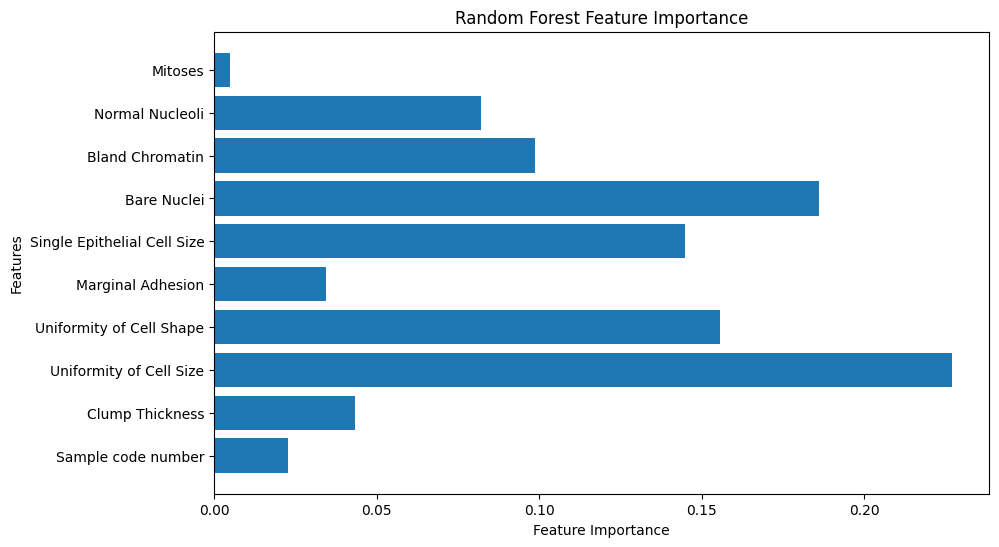

In [37]:
plt.figure(figsize=(10,6))
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.show()


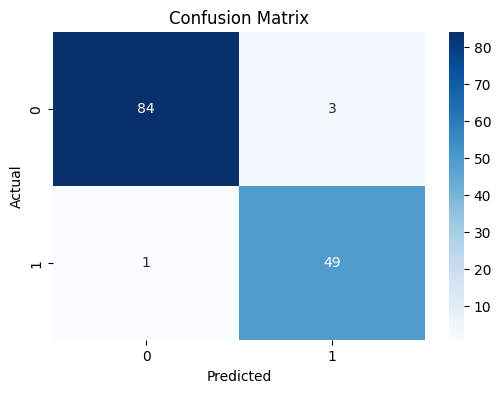

In [39]:
#Visualization: Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [25]:
#Visualize One Decision Tree from Random Forest
from sklearn.tree import export_graphviz
import graphviz

In [27]:
estimator = classifier.estimators_[0]

In [29]:
dot_data = export_graphviz(
    estimator,
    out_file=None,
    feature_names=z.columns,
    class_names=["No Cancer", "Cancer"],
    filled=True,
    rounded=True
)

In [31]:
graph = graphviz.Source(dot_data)
graph.render("tree_visualization", format="png")

'tree_visualization.png'

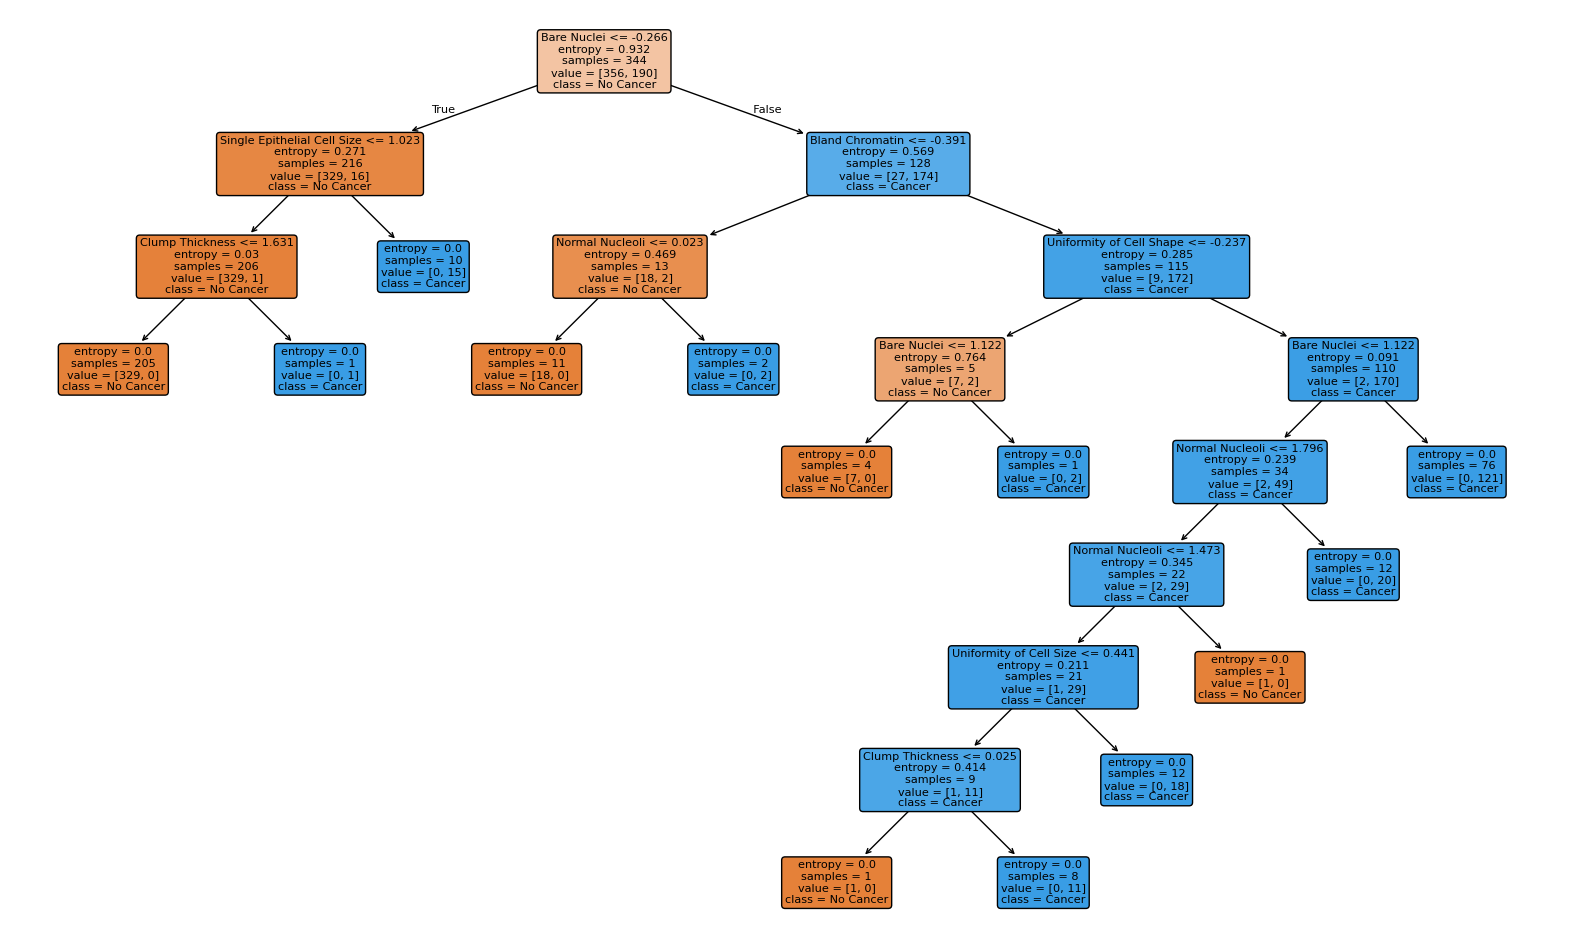

In [35]:
plt.figure(figsize=(20,12))
tree.plot_tree(
    estimator,
    feature_names=z.columns,        # dataset X columns
    class_names=["No Cancer", "Cancer"],  # adjust based on  dataset
    filled=True,
    rounded=True
)
plt.savefig("tree_visualization.png", dpi=300) 
plt.show()